Epoch 1/250 - Train Loss: 0.0549
Epoch 1 - Eval Metric (Train Loss): 0.0549
Epoch 2/250 - Train Loss: 0.0379
Epoch 2 - Eval Metric (Train Loss): 0.0379
Epoch 3/250 - Train Loss: 0.0327
Epoch 3 - Eval Metric (Train Loss): 0.0327
Epoch 4/250 - Train Loss: 0.0303
Epoch 4 - Eval Metric (Train Loss): 0.0303
Epoch 5/250 - Train Loss: 0.0289
Epoch 5 - Eval Metric (Train Loss): 0.0289
Epoch 6/250 - Train Loss: 0.0278
Epoch 6 - Eval Metric (Train Loss): 0.0278
Epoch 7/250 - Train Loss: 0.0271
Epoch 7 - Eval Metric (Train Loss): 0.0271
Epoch 8/250 - Train Loss: 0.0266
Epoch 8 - Eval Metric (Train Loss): 0.0266
Epoch 9/250 - Train Loss: 0.0262
Epoch 9 - Eval Metric (Train Loss): 0.0262
Epoch 10/250 - Train Loss: 0.0258
Epoch 10 - Eval Metric (Train Loss): 0.0258
Epoch 11/250 - Train Loss: 0.0255
Epoch 11 - Eval Metric (Train Loss): 0.0255
Epoch 12/250 - Train Loss: 0.0252
Epoch 12 - Eval Metric (Train Loss): 0.0252
Epoch 13/250 - Train Loss: 0.0249
Epoch 13 - Eval Metric (Train Loss): 0.0249
Epoc

Epoch 250/250 - Train Loss: 0.0200
Epoch 250 - Eval Metric (Train Loss): 0.0200
Saving best state with metric: 0.0199
Checkpoint saved at step 250 in directory '/home/uribagi/Latent-IQP/weights/binary_vae_250epoch_3e-4lr_16latentdim/checkpoint_250'
Checkpoint saved at the end of training: /home/uribagi/Latent-IQP/weights/binary_vae_250epoch_3e-4lr_16latentdim/checkpoint_250


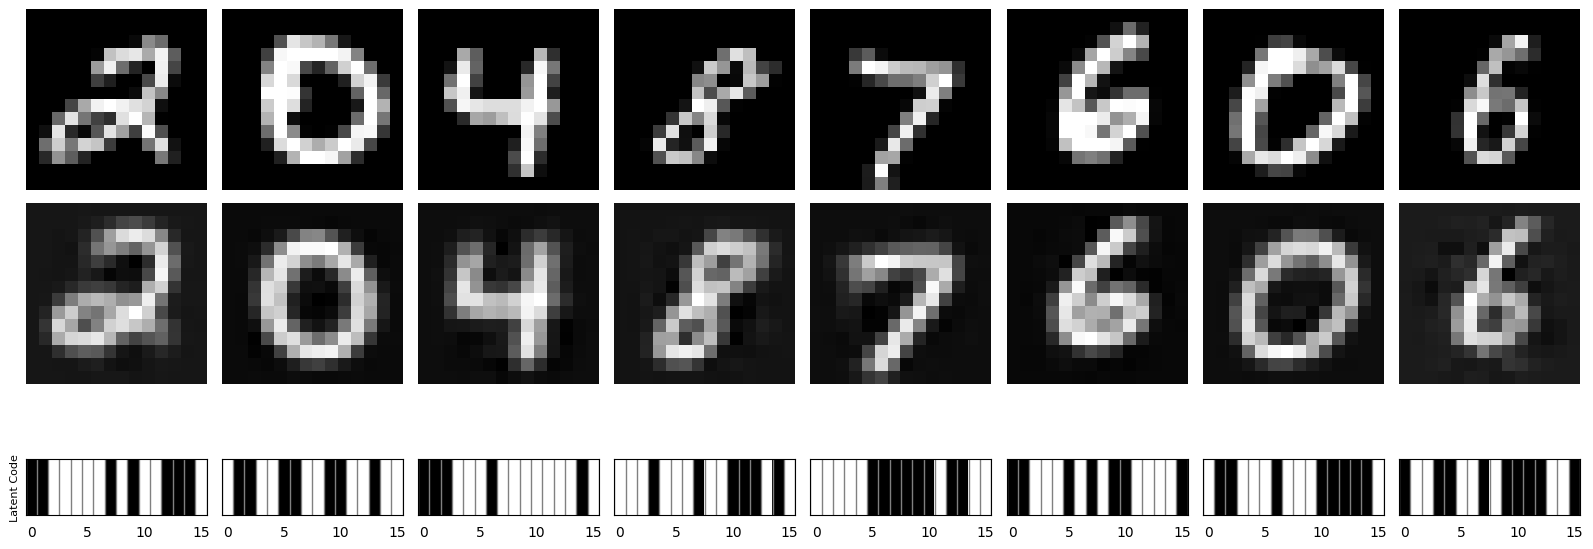

2025-04-09 16:45:22.039837: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [1]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer

batch_size = 128
latent_dim = 16
rng = random.PRNGKey(0)
binary_vae = model(latents=latent_dim)
input_shape = (batch_size, 196)
learning_rate = 3e-4

train_dataset = MNISTDataset(split='train', batch_size=batch_size, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=batch_size, image_size=(14, 14)).load()

trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

trainer.train(train_dataset, batch_size=batch_size, num_epochs=250, run_dir="weights/binary_vae_250epoch_3e-4lr_16latentdim")

trainer.plot_reconstructions(test_dataset, num_images=8)